# IMPORT LIBRARIES AND DATASETS

In [1]:
from collections import Counter
import operator
import plotly.express as px
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
import nltk
import re
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from tensorflow.keras.preprocessing.text import one_hot, Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, TimeDistributed, RepeatVector, Embedding, Input, LSTM, Conv1D, MaxPool1D, Bidirectional
from tensorflow.keras.models import Model
from jupyterthemes import jtplot
jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False)

In [2]:
# load the data
df_english = pd.read_csv('small_vocab_en.csv', sep = '/t', names = ['english'])
df_french = pd.read_csv('small_vocab_fr.csv', sep = '/t', names = ['french'])

C:\Users\NAMAN MAHESHWARI\AppData\Local\Temp\ipykernel_29004\3214129257.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df_english = pd.read_csv('small_vocab_en.csv', sep = '/t', names = ['english'])
C:\Users\NAMAN MAHESHWARI\AppData\Local\Temp\ipykernel_29004\3214129257.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df_french = pd.read_csv('small_vocab_fr.csv', sep = '/t', names = ['french'])


In [3]:
# data containing english text
df_english
# data containing frensh text
df_french

# dataframe information
df_english.info
# dataframe information
df_french.info()

# check for null values
df_english.isnull().sum()
# check for null values
df_french.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137860 entries, 0 to 137859
Data columns (total 1 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   french  137860 non-null  object
dtypes: object(1)
memory usage: 1.1+ MB


french    0
dtype: int64

In [4]:
# Concatenate english and french 
df = pd.concat([df_english, df_french], axis = 1)
df

english  \
0       new jersey is sometimes quiet during autumn , ...   
1       the united states is usually chilly during jul...   
2       california is usually quiet during march , and...   
3       the united states is sometimes mild during jun...   
4       your least liked fruit is the grape , but my l...   
...                                                   ...   
137855  france is never busy during march , and it is ...   
137856  india is sometimes beautiful during spring , a...   
137857  india is never wet during summer , but it is s...   
137858  france is never chilly during january , but it...   
137859  the orange is her favorite fruit , but the ban...   

                                                   french  
0       new jersey est parfois calme pendant l' automn...  
1       les états-unis est généralement froid en juill...  
2       california est généralement calme en mars , et...  
3       les états-unis est parfois légère en juin , et...  
4       votre moins aimé fruit est le raisin , mais mo...  
...                                                   ...  
137855  la france est jamais occupée en mars , et il e...  
137856  l' inde est parfois belle au printemps , et il...  
137857  l' inde est jamais mouillé pendant l' été , ma...  
137858  la france est jamais froid en janvier , mais i...  
137859  l'orange est son fruit préféré , mais la banan...  

[137860 rows x 2 columns]

In [5]:
print("Total English Records = {}".format(len(df['english'])))
print("Total French Records = {}".format(len(df['french'])))

Total English Records = 137860
Total French Records = 137860


# PERFORM DATA CLEANING

In [6]:
# download nltk packages
nltk.download('punkt')

# download stopwords
nltk.download("stopwords")

[nltk_data] Downloading package punkt to C:\Users\NAMAN
[nltk_data]     MAHESHWARI\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\NAMAN
[nltk_data]     MAHESHWARI\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [7]:
# function to remove punctuations
def remove_punc(x):
  return re.sub('[!#?,.:";]', '', x)

In [8]:
df['french'] = df['french'].apply(remove_punc)
df['english'] = df['english'].apply(remove_punc)

In [9]:
english_words = []
french_words  = []

In [10]:
# function to get the list of unique words
def get_label_superset(x, word_list):
    for label in x.split():
        if label not in word_list:
            word_list.append(label)
            
            
df['english'].apply(lambda x: get_label_superset(x, english_words))
df['french'].apply(lambda x: get_label_superset(x, french_words))

# number of unique words in english
total_english_words  = len(english_words)
total_english_words

# number of unique words in french
total_french_words = len(french_words)
total_french_words

350

# VISUALIZE CLEANED UP DATASET

In [11]:
# Obtain list of all words in the dataset
words = []
for i in df['english']:
  for word in i.split():
    words.append(word)
    
words

['new',
 'jersey',
 'is',
 'sometimes',
 'quiet',
 'during',
 'autumn',
 'and',
 'it',
 'is',
 'snowy',
 'in',
 'april',
 'the',
 'united',
 'states',
 'is',
 'usually',
 'chilly',
 'during',
 'july',
 'and',
 'it',
 'is',
 'usually',
 'freezing',
 'in',
 'november',
 'california',
 'is',
 'usually',
 'quiet',
 'during',
 'march',
 'and',
 'it',
 'is',
 'usually',
 'hot',
 'in',
 'june',
 'the',
 'united',
 'states',
 'is',
 'sometimes',
 'mild',
 'during',
 'june',
 'and',
 'it',
 'is',
 'cold',
 'in',
 'september',
 'your',
 'least',
 'liked',
 'fruit',
 'is',
 'the',
 'grape',
 'but',
 'my',
 'least',
 'liked',
 'is',
 'the',
 'apple',
 'his',
 'favorite',
 'fruit',
 'is',
 'the',
 'orange',
 'but',
 'my',
 'favorite',
 'is',
 'the',
 'grape',
 'paris',
 'is',
 'relaxing',
 'during',
 'december',
 'but',
 'it',
 'is',
 'usually',
 'chilly',
 'in',
 'july',
 'new',
 'jersey',
 'is',
 'busy',
 'during',
 'spring',
 'and',
 'it',
 'is',
 'never',
 'hot',
 'in',
 'march',
 'our',
 'leas

In [12]:
# Obtain the total count of words
english_words_counts = Counter(words)
english_words_counts

Counter({'is': 205858,
         'in': 75525,
         'it': 75137,
         'during': 74933,
         'the': 67628,
         'but': 63987,
         'and': 59850,
         'sometimes': 37746,
         'usually': 37507,
         'never': 37500,
         'favorite': 28332,
         'least': 27564,
         'fruit': 27192,
         'most': 14934,
         'loved': 14166,
         'liked': 14046,
         'new': 12197,
         'paris': 11334,
         'india': 11277,
         'united': 11270,
         'states': 11270,
         'california': 11250,
         'jersey': 11225,
         'france': 11170,
         'china': 10953,
         'he': 10786,
         'she': 10786,
         'grapefruit': 10692,
         'your': 9734,
         'my': 9700,
         'his': 9700,
         'her': 9700,
         'fall': 9134,
         'june': 9133,
         'spring': 9102,
         'january': 9090,
         'winter': 9038,
         'march': 9023,
         'autumn': 9004,
         'may': 8995,
         'nice': 

In [13]:
# sort the dictionary by values
english_words_counts = sorted(english_words_counts.items(), key = operator.itemgetter(1), reverse = True)

In [14]:
english_words_counts

[('is', 205858),
 ('in', 75525),
 ('it', 75137),
 ('during', 74933),
 ('the', 67628),
 ('but', 63987),
 ('and', 59850),
 ('sometimes', 37746),
 ('usually', 37507),
 ('never', 37500),
 ('favorite', 28332),
 ('least', 27564),
 ('fruit', 27192),
 ('most', 14934),
 ('loved', 14166),
 ('liked', 14046),
 ('new', 12197),
 ('paris', 11334),
 ('india', 11277),
 ('united', 11270),
 ('states', 11270),
 ('california', 11250),
 ('jersey', 11225),
 ('france', 11170),
 ('china', 10953),
 ('he', 10786),
 ('she', 10786),
 ('grapefruit', 10692),
 ('your', 9734),
 ('my', 9700),
 ('his', 9700),
 ('her', 9700),
 ('fall', 9134),
 ('june', 9133),
 ('spring', 9102),
 ('january', 9090),
 ('winter', 9038),
 ('march', 9023),
 ('autumn', 9004),
 ('may', 8995),
 ('nice', 8984),
 ('september', 8958),
 ('july', 8956),
 ('april', 8954),
 ('november', 8951),
 ('summer', 8948),
 ('december', 8945),
 ('february', 8942),
 ('our', 8932),
 ('their', 8932),
 ('freezing', 8928),
 ('pleasant', 8916),
 ('beautiful', 8915),
 ('

In [15]:
# append the values to a list for visualization purposes
english_words = []
english_counts = []
for i in range(len(english_words_counts)):
  english_words.append(english_words_counts[i][0])
  english_counts.append(english_words_counts[i][1])

In [16]:
english_words

['is',
 'in',
 'it',
 'during',
 'the',
 'but',
 'and',
 'sometimes',
 'usually',
 'never',
 'favorite',
 'least',
 'fruit',
 'most',
 'loved',
 'liked',
 'new',
 'paris',
 'india',
 'united',
 'states',
 'california',
 'jersey',
 'france',
 'china',
 'he',
 'she',
 'grapefruit',
 'your',
 'my',
 'his',
 'her',
 'fall',
 'june',
 'spring',
 'january',
 'winter',
 'march',
 'autumn',
 'may',
 'nice',
 'september',
 'july',
 'april',
 'november',
 'summer',
 'december',
 'february',
 'our',
 'their',
 'freezing',
 'pleasant',
 'beautiful',
 'october',
 'snowy',
 'warm',
 'cold',
 'wonderful',
 'dry',
 'busy',
 'august',
 'chilly',
 'rainy',
 'mild',
 'wet',
 'relaxing',
 'quiet',
 'hot',
 'dislikes',
 'likes',
 'limes',
 'lemons',
 'grapes',
 'mangoes',
 'apples',
 'peaches',
 'oranges',
 'pears',
 'strawberries',
 'bananas',
 'to',
 'grape',
 'apple',
 'orange',
 'lemon',
 'lime',
 'banana',
 'mango',
 'pear',
 'strawberry',
 'peach',
 'like',
 'dislike',
 'they',
 'that',
 'i',
 'we',


In [17]:
english_counts

[205858,
 75525,
 75137,
 74933,
 67628,
 63987,
 59850,
 37746,
 37507,
 37500,
 28332,
 27564,
 27192,
 14934,
 14166,
 14046,
 12197,
 11334,
 11277,
 11270,
 11270,
 11250,
 11225,
 11170,
 10953,
 10786,
 10786,
 10692,
 9734,
 9700,
 9700,
 9700,
 9134,
 9133,
 9102,
 9090,
 9038,
 9023,
 9004,
 8995,
 8984,
 8958,
 8956,
 8954,
 8951,
 8948,
 8945,
 8942,
 8932,
 8932,
 8928,
 8916,
 8915,
 8910,
 8898,
 8890,
 8878,
 8808,
 8794,
 8791,
 8789,
 8770,
 8761,
 8743,
 8726,
 8696,
 8693,
 8639,
 7314,
 7314,
 5844,
 5844,
 5844,
 5844,
 5844,
 5844,
 5844,
 5844,
 5844,
 5844,
 5166,
 4848,
 4848,
 4848,
 4848,
 4848,
 4848,
 4848,
 4848,
 4848,
 4848,
 4588,
 4444,
 3222,
 2712,
 2664,
 2532,
 2414,
 2304,
 1944,
 1944,
 1944,
 1944,
 1867,
 1666,
 1386,
 1296,
 1224,
 1016,
 1016,
 972,
 972,
 972,
 972,
 972,
 972,
 972,
 972,
 972,
 870,
 781,
 768,
 768,
 768,
 714,
 666,
 648,
 648,
 648,
 648,
 540,
 480,
 476,
 384,
 378,
 378,
 378,
 360,
 312,
 312,
 312,
 312,
 312,
 30

In [18]:
# Plot barplot using plotly 
fig = px.bar(x = english_words, y = english_counts)
fig.show()

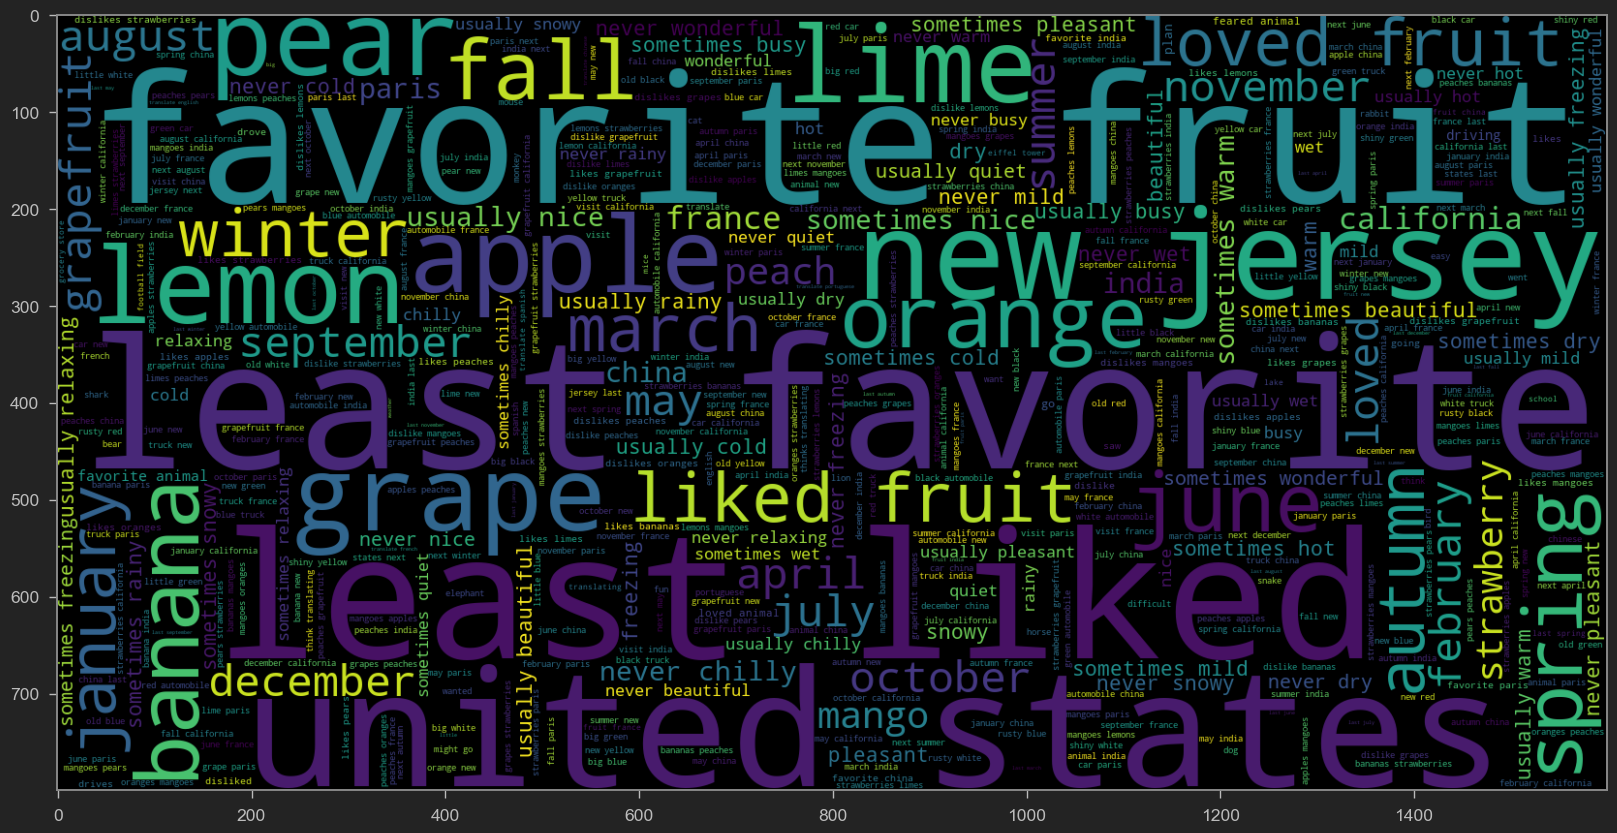

In [19]:
# plot the word cloud for text that is Real
plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 2000, width = 1600, height = 800 ).generate(" ".join(df.english))
plt.imshow(wc, interpolation = 'bilinear')

In [20]:
df.english[0]
nltk.word_tokenize(df.english[0])

['new',
 'jersey',
 'is',
 'sometimes',
 'quiet',
 'during',
 'autumn',
 'and',
 'it',
 'is',
 'snowy',
 'in',
 'april']

In [21]:
# Maximum length (number of words) per document. We will need it later for embeddings
maxlen_english = -1
for doc in df.english:
    tokens = nltk.word_tokenize(doc)
    if(maxlen_english < len(tokens)):
        maxlen_english = len(tokens)
print("The maximum number of words in any document = ", maxlen_english)

The maximum number of words in any document =  15


MINI CHALLENGE #4 (QUIZ!): 
- Perform similar data visualizations but for the french language instead
- What are the top 3 common french words?!
- What is the maximum number of words in any french document?

In [25]:
# obtain the count of french words
words = []
for i in df['french']:
  for word in i.split():
    words.append(word)
words

['new',
 'jersey',
 'est',
 'parfois',
 'calme',
 'pendant',
 "l'",
 'automne',
 'et',
 'il',
 'est',
 'neigeux',
 'en',
 'avril',
 'les',
 'Ã©tats-unis',
 'est',
 'gÃ©nÃ©ralement',
 'froid',
 'en',
 'juillet',
 'et',
 'il',
 'gÃ¨le',
 'habituellement',
 'en',
 'novembre',
 'california',
 'est',
 'gÃ©nÃ©ralement',
 'calme',
 'en',
 'mars',
 'et',
 'il',
 'est',
 'gÃ©nÃ©ralement',
 'chaud',
 'en',
 'juin',
 'les',
 'Ã©tats-unis',
 'est',
 'parfois',
 'lÃ©gÃ¨re',
 'en',
 'juin',
 'et',
 'il',
 'fait',
 'froid',
 'en',
 'septembre',
 'votre',
 'moins',
 'aimÃ©',
 'fruit',
 'est',
 'le',
 'raisin',
 'mais',
 'mon',
 'moins',
 'aimÃ©',
 'est',
 'la',
 'pomme',
 'son',
 'fruit',
 'prÃ©fÃ©rÃ©',
 'est',
 "l'orange",
 'mais',
 'mon',
 'prÃ©fÃ©rÃ©',
 'est',
 'le',
 'raisin',
 'paris',
 'est',
 'relaxant',
 'en',
 'dÃ©cembre',
 'mais',
 'il',
 'est',
 'gÃ©nÃ©ralement',
 'froid',
 'en',
 'juillet',
 'new',
 'jersey',
 'est',
 'occupÃ©',
 'au',
 'printemps',
 'et',
 'il',
 'est',
 'jamais',
 'chaud

In [26]:
french_words_counts = Counter(words)
french_words_counts

Counter({'new': 11047,
         'jersey': 11052,
         'est': 196809,
         'parfois': 37746,
         'calme': 7256,
         'pendant': 10741,
         "l'": 32917,
         'automne': 14727,
         'et': 59851,
         'il': 84079,
         'neigeux': 1867,
         'en': 105768,
         'avril': 8954,
         'les': 65255,
         'Ã©tats-unis': 11210,
         'gÃ©nÃ©ralement': 31292,
         'froid': 16794,
         'juillet': 8956,
         'gÃ¨le': 3622,
         'habituellement': 6215,
         'novembre': 8951,
         'california': 3061,
         'mars': 9023,
         'chaud': 16405,
         'juin': 9133,
         'lÃ©gÃ¨re': 63,
         'fait': 2916,
         'septembre': 8958,
         'votre': 9368,
         'moins': 27557,
         'aimÃ©': 25852,
         'fruit': 23626,
         'le': 35306,
         'raisin': 4852,
         'mais': 63987,
         'mon': 9403,
         'la': 49861,
         'pomme': 4848,
         'son': 16496,
         'prÃ©fÃ©rÃ©': 

In [27]:
# sort the dictionary by values
french_words_counts = sorted(french_words_counts.items(), key = operator.itemgetter(1), reverse = True)

In [28]:
french_words_counts

[('est', 196809),
 ('en', 105768),
 ('il', 84079),
 ('les', 65255),
 ('mais', 63987),
 ('et', 59851),
 ('la', 49861),
 ('parfois', 37746),
 ('jamais', 37215),
 ('le', 35306),
 ("l'", 32917),
 ('gÃ©nÃ©ralement', 31292),
 ('moins', 27557),
 ('aimÃ©', 25852),
 ('au', 25738),
 ('fruit', 23626),
 ('prÃ©fÃ©rÃ©', 23305),
 ('agrÃ©able', 17751),
 ('froid', 16794),
 ('son', 16496),
 ('chaud', 16405),
 ('de', 15070),
 ('plus', 14934),
 ('automne', 14727),
 ('mois', 14350),
 ('Ã', 13870),
 ('elle', 12056),
 ('citrons', 11679),
 ('paris', 11334),
 ('inde', 11277),
 ('Ã©tats-unis', 11210),
 ('france', 11170),
 ('jersey', 11052),
 ('new', 11047),
 ('chine', 10936),
 ('pendant', 10741),
 ('pamplemousse', 10140),
 ('mon', 9403),
 ('votre', 9368),
 ('juin', 9133),
 ('printemps', 9100),
 ('janvier', 9090),
 ('hiver', 9038),
 ('mars', 9023),
 ('Ã©tÃ©', 8999),
 ('mai', 8995),
 ('septembre', 8958),
 ('juillet', 8956),
 ('avril', 8954),
 ('novembre', 8951),
 ('dÃ©cembre', 8945),
 ('fÃ©vrier', 8942),
 ('octob

In [29]:
# append the values to a list for visuaization purpose
french_words = []
french_counts = []
for i in range(len(french_words_counts)):
  french_words.append(french_words_counts[i][0])
  french_counts.append(french_words_counts[i][1])

In [30]:
fig = px.bar(x = french_words, y = french_counts)
fig.show()

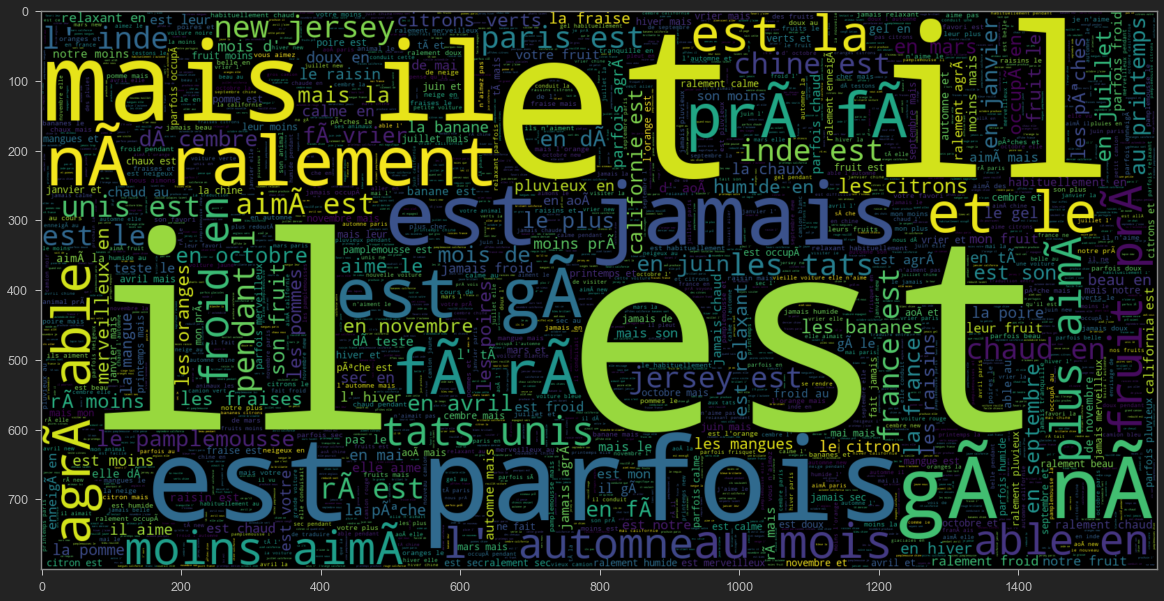

In [31]:
# plot the word cloud for French
plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(df.french))
plt.imshow(wc, interpolation = 'bilinear')

In [24]:
# Maximum length (number of words) per document. We will need it later for embeddings
maxlen_french = -1
for doc in df.french:
    tokens = nltk.word_tokenize(doc)
    if(maxlen_french < len(tokens)):
        maxlen_french = len(tokens)
print("The maximum number of words in any document = ", maxlen_french)

The maximum number of words in any document =  23


# PREPARE THE DATA BY PERFORMING TOKENIZATION AND PADDING

In [22]:
def tokenize_and_pad(x, maxlen):
  #  a tokenier to tokenize the words and create sequences of tokenized words
  tokenizer = Tokenizer(char_level = False)
  tokenizer.fit_on_texts(x)
  sequences = tokenizer.texts_to_sequences(x)
  padded = pad_sequences(sequences, maxlen = maxlen, padding = 'post')
  return tokenizer, sequences, padded

In [25]:
# tokenize and padding to the data 
x_tokenizer, x_sequences, x_padded = tokenize_and_pad(df.english, maxlen_english)
y_tokenizer, y_sequences, y_padded = tokenize_and_pad(df.french,  maxlen_french)

In [26]:
# Total vocab size, since we added padding we add 1 to the total word count
english_vocab_size = total_english_words + 1
print("Complete English Vocab Size:", english_vocab_size)

Complete English Vocab Size: 200


In [27]:
# Total vocab size, since we added padding we add 1 to the total word count
french_vocab_size = total_french_words + 1
print("Complete French Vocab Size:", french_vocab_size)

Complete French Vocab Size: 351


In [28]:
print("The tokenized version for document\n", df.english[-1:].item(),"\n is : ", x_padded[-1:])

The tokenized version for document
 the orange is her favorite fruit  but the banana is your favorite  
 is :  [[ 5 84  1 32 11 13  6  5 87  1 29 11  0  0  0]]


In [29]:
print("The tokenized version for document\n", df.french[-1:].item(),"\n is : ", y_padded[-1:])

The tokenized version for document
 l'orange est son fruit préféré  mais la banane est votre favori  
 is :  [[84  1 20 16 17  5  7 87  1 40 93  0  0  0  0  0  0  0  0  0  0  0  0]]


In [30]:
# function to obtain the text from padded variables
def pad_to_text(padded, tokenizer):

    id_to_word = {id: word for word, id in tokenizer.word_index.items()}
    id_to_word[0] = ''

    return ' '.join([id_to_word[j] for j in padded])

In [31]:
pad_to_text(y_padded[0], y_tokenizer)

"new jersey est parfois calme pendant l' automne et il est neigeux en avril         "

In [32]:
# Train test split
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_padded, y_padded, test_size = 0.1)

# BUILD AND TRAIN THE MODEL 

In [34]:
# Sequential Model
model = Sequential()
# embedding layer
model.add(Embedding(english_vocab_size, 256, input_length = maxlen_english, mask_zero = True))
# encoder
model.add(LSTM(256))
# decoder
# repeatvector repeats the input for the desired number of times to change
# 2D-array to 3D array. For example: (1,256) to (1,23,256)
model.add(RepeatVector(maxlen_french))
model.add(LSTM(256, return_sequences= True ))
model.add(TimeDistributed(Dense(french_vocab_size, activation ='softmax')))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 15, 256)           51200     
                                                                 
 lstm (LSTM)                 (None, 256)               525312    
                                                                 
 repeat_vector (RepeatVecto  (None, 23, 256)           0         
 r)                                                              
                                                                 
 lstm_1 (LSTM)               (None, 23, 256)           525312    
                                                                 
 time_distributed (TimeDist  (None, 23, 351)           90207     
 ributed)                                                        
                                                                 
Total params: 1192031 (4.55 MB)
Trainable params: 1192

In [35]:
# change the shape of target from 2D to 3D
y_train = np.expand_dims(y_train, axis = 2)
y_train.shape

(124074, 23, 1)

In [37]:
# train the model
model.fit(x_train, y_train, batch_size=1024, validation_split= 0.1, epochs=10)

Epoch 1/10
110/110 [==============================] - 224s 2s/step - loss: 2.0947 - accuracy: 0.5452 - val_loss: 1.8203 - val_accuracy: 0.5768
Epoch 2/10
110/110 [==============================] - 230s 2s/step - loss: 1.6114 - accuracy: 0.6019 - val_loss: 1.5680 - val_accuracy: 0.5927
Epoch 3/10
110/110 [==============================] - 210s 2s/step - loss: 1.3613 - accuracy: 0.6384 - val_loss: 1.2677 - val_accuracy: 0.6574
Epoch 4/10
110/110 [==============================] - 186s 2s/step - loss: 1.1973 - accuracy: 0.6701 - val_loss: 1.1293 - val_accuracy: 0.6850
Epoch 5/10
110/110 [==============================] - 178s 2s/step - loss: 1.0515 - accuracy: 0.7026 - val_loss: 0.9933 - val_accuracy: 0.7174
Epoch 6/10
110/110 [==============================] - 179s 2s/step - loss: 0.9398 - accuracy: 0.7307 - val_loss: 0.8921 - val_accuracy: 0.7452
Epoch 7/10
110/110 [==============================] - 179s 2s/step - loss: 0.8456 - accuracy: 0.7560 - val_loss: 0.8039 - val_accuracy: 0.7681

# ASSESS TRAINED MODEL PERFORMANCE


In [38]:
# function to make prediction
def prediction(x, x_tokenizer = x_tokenizer, y_tokenizer = y_tokenizer):
    predictions = model.predict(x)[0]
    id_to_word = {id: word for word, id in y_tokenizer.word_index.items()}
    id_to_word[0] = ''
    return ' '.join([id_to_word[j] for j in np.argmax(predictions,1)])

In [39]:
for i in range(5):

  print('Original English word - {}\n'.format(pad_to_text(x_test[i], x_tokenizer)))
  print('Original French word - {}\n'.format(pad_to_text(y_test[i], y_tokenizer)))
  print('Predicted French word - {}\n\n\n\n'.format(prediction(x_test[i:i+1])))

Original English word - she was driving a big red automobile        

Original French word - elle conduisait une grosse voiture rouge                 

1/1 [==============================] - 4s 4s/step
Predicted French word - elle conduisait une volant voiture rouge                 




Original English word - china is snowy during september and it is sometimes wet in april   

Original French word - chine est enneigée en septembre et il est parfois humide en avril           

1/1 [==============================] - 0s 57ms/step
Predicted French word - chine est parfois en en et et est est parfois en en avril          




Original English word - they like strawberries peaches and bananas         

Original French word - ils aiment les fraises les pêches et les bananes              

1/1 [==============================] - 0s 51ms/step
Predicted French word - ils aiment les fraises les fraises et les bananes              




Original English word - it's fun to translate spanish to chine

Train the model with different embedding output dimension

In [41]:
# Sequential Model
model = Sequential()

# embedding layer
model.add(Embedding(english_vocab_size, 128, input_length = maxlen_english, mask_zero = True))
model.add(LSTM(256))
model.add(RepeatVector(maxlen_french))
model.add(LSTM(256, return_sequences= True ))
model.add(TimeDistributed(Dense(french_vocab_size, activation ='softmax')))
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 15, 128)           25600     
                                                                 
 lstm_4 (LSTM)               (None, 256)               394240    
                                                                 
 repeat_vector_2 (RepeatVec  (None, 23, 256)           0         
 tor)                                                            
                                                                 
 lstm_5 (LSTM)               (None, 23, 256)           525312    
                                                                 
 time_distributed_2 (TimeDi  (None, 23, 351)           90207     
 stributed)                                                      
                                                                 
Total params: 1035359 (3.95 MB)
Trainable params: 1035

In [42]:
# change the shape of target from 2D to 3D
y_train = np.expand_dims(y_train, axis = 2)
y_train.shape

(124074, 23, 1, 1)

In [43]:
# train the model
model.fit(x_train, y_train, batch_size=1024, validation_split= 0.1, epochs=10)

Epoch 1/10
110/110 [==============================] - 229s 2s/step - loss: 2.7218 - accuracy: 0.4944 - val_loss: 2.1136 - val_accuracy: 0.5501
Epoch 2/10
110/110 [==============================] - 173s 2s/step - loss: 1.9127 - accuracy: 0.5727 - val_loss: 1.7080 - val_accuracy: 0.5781
Epoch 3/10
110/110 [==============================] - 186s 2s/step - loss: 1.5105 - accuracy: 0.6163 - val_loss: 1.4631 - val_accuracy: 0.6202
Epoch 4/10
110/110 [==============================] - 198s 2s/step - loss: 1.3308 - accuracy: 0.6448 - val_loss: 1.2782 - val_accuracy: 0.6512
Epoch 5/10
110/110 [==============================] - 211s 2s/step - loss: 1.1732 - accuracy: 0.6714 - val_loss: 1.1052 - val_accuracy: 0.6864
Epoch 6/10
110/110 [==============================] - 195s 2s/step - loss: 1.0336 - accuracy: 0.7073 - val_loss: 1.0044 - val_accuracy: 0.7120
Epoch 7/10
110/110 [==============================] - 207s 2s/step - loss: 0.9206 - accuracy: 0.7350 - val_loss: 0.9268 - val_accuracy: 0.7223

# ASSESS TRAINED MODEL PERFORMANCE


In [44]:
# function to make prediction
def prediction(x, x_tokenizer = x_tokenizer, y_tokenizer = y_tokenizer):
    predictions = model.predict(x)[0]
    id_to_word = {id: word for word, id in y_tokenizer.word_index.items()}
    id_to_word[0] = ''
    return ' '.join([id_to_word[j] for j in np.argmax(predictions,1)])

In [45]:
for i in range(5):

  print('Original English word - {}\n'.format(pad_to_text(x_test[i], x_tokenizer)))
  print('Original French word - {}\n'.format(pad_to_text(y_test[i], y_tokenizer)))
  print('Predicted French word - {}\n\n\n\n'.format(prediction(x_test[i:i+1])))

Original English word - she was driving a big red automobile        

Original French word - elle conduisait une grosse voiture rouge                 

1/1 [==============================] - 4s 4s/step
Predicted French word - elle conduisait une volant voiture verte                 




Original English word - china is snowy during september and it is sometimes wet in april   

Original French word - chine est enneigée en septembre et il est parfois humide en avril           

1/1 [==============================] - 0s 52ms/step
Predicted French word - chine est généralement en printemps et il est est parfois en en           




Original English word - they like strawberries peaches and bananas         

Original French word - ils aiment les fraises les pêches et les bananes              

1/1 [==============================] - 0s 51ms/step
Predicted French word - ils aiment les les les et et les               




Original English word - it's fun to translate spanish to chinese       

# END